In [1]:
library(shazam)
library(tidyverse)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [55]:
sample <- read.csv('./data/QJY/heavy_parse-select.tsv', header=T, sep='\t')  %>% as.tibble()

In [56]:
sample %>% head(3)
sample$c_call %>% table()

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,cdr3,cell_id,c_call,consensus_count,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCTGAGGGCATGT-1_contig_2,CTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCATTCGGTGATCAGCACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGGTTTTCCTCGTTGCTCTTTTAAGAGGTGTCCAGTGTCAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGATGGAAGTAATAAATACTATGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGCACCCACCAAGGCTCCGGATGTGTTCCCCATCATATCAGGGTGCAGACACCCAAAGGATAACAGCCCTGTGGTCCTGGCATGCTTGATAACTGGGTACCACC,FALSE,TRUE,"IGHV3-30*18,IGHV3-30-5*01","IGHD2-2*01,IGHD2-2*02",IGHJ5*02,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGAT......GGAAGTAATAAATACTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGAT......GGAAGTAATAAATACTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGANNNNNNAGGATATTGTAGTAGTACCAGCTGCTNNNNNNNNNNCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,TGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGG,⋯,GCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCC,AAACCTGAGGGCATGT-1,IGHD,5284,5,IGHV3-30,IGHD2-2,IGHJ5,TGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGG,CAKDRRGYCSSTSCSHPPWFDPW
AAACCTGCAGTGGGAT-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,IGHV3-23*04,"IGHD2-2*01,IGHD2-2*03",IGHJ4*02,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAANNNNNNNNNGGATATTGTAGTAGTACCAGCTGCTATGNNCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,TGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGG,⋯,GCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTAC,AAACCTGCAGTGGGAT-1,IGHM,18168,9,IGHV3-23,IGHD2-2,IGHJ4,TGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGG,CANFWGDIVVVPAAMSFDYW
AAACCTGGTCTTGATG-1_contig_2,TGGGGAATCCTGCTCTCCACCATGGACATACTTTGTTCCACGCTCCTGCTACTGACTGTCCCGTCCTGGGTCTTATCCCAGG

.
      IGHA1 IGHA2  IGHD IGHG1 IGHG2 IGHG3 IGHG4  IGHM 
    1    39    26    31    82    35    11     2   339 

In [57]:
# since some cell have more than one heavy chain we should choose one with higher umi
# dist_sc <- distToNearest(sample, cellIdColumn="cell_id", locusColumn="locus", VJthenLen=FALSE, onlyHeavy=FALSE)

In [58]:
sample %>% dim()
sample_index <- sample %>% group_by(cell_id) %>% summarise(umi_count=max(umi_count)) 
sample_filter <- sample[which(paste0(sample$cell_id,sample$umi_count) %in% paste0(sample_index$cell_id,sample_index$umi_count) ),]
sample_filter %>% dim()
sample_filter %>% head(3)

[1] 566  57

[1] 565  57

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,cdr3,cell_id,c_call,consensus_count,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCTGAGGGCATGT-1_contig_2,CTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCATTCGGTGATCAGCACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGGTTTTCCTCGTTGCTCTTTTAAGAGGTGTCCAGTGTCAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTCAGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGATGGAAGTAATAAATACTATGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGCACCCACCAAGGCTCCGGATGTGTTCCCCATCATATCAGGGTGCAGACACCCAAAGGATAACAGCCCTGTGGTCCTGGCATGCTTGATAACTGGGTACCACC,FALSE,TRUE,"IGHV3-30*18,IGHV3-30-5*01","IGHD2-2*01,IGHD2-2*02",IGHJ5*02,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGAT......GGAAGTAATAAATACTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,CAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTATGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATCATATGAT......GGAAGTAATAAATACTATGCAGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCTGAGGACACGGCTGTGTATTACTGTGCGAAAGANNNNNNAGGATATTGTAGTAGTACCAGCTGCTNNNNNNNNNNCTGGTTCGACCCCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,TGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGG,⋯,GCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCC,AAACCTGAGGGCATGT-1,IGHD,5284,5,IGHV3-30,IGHD2-2,IGHJ5,TGTGCGAAAGACCGGAGAGGATATTGTAGTAGTACCAGCTGCTCGCATCCCCCCTGGTTCGACCCCTGG,CAKDRRGYCSSTSCSHPPWFDPW
AAACCTGCAGTGGGAT-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,IGHV3-23*04,"IGHD2-2*01,IGHD2-2*03",IGHJ4*02,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAANNNNNNNNNGGATATTGTAGTAGTACCAGCTGCTATGNNCTTTGACTACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAG,TGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGG,⋯,GCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTAC,AAACCTGCAGTGGGAT-1,IGHM,18168,9,IGHV3-23,IGHD2-2,IGHJ4,TGTGCGAATTTCTGGGGGGATATTGTAGTAGTACCAGCTGCTATGAGCTTTGACTACTGG,CANFWGDIVVVPAAMSFDYW
AAACCTGGTCTTGATG-1_contig_2,TGGGGAATCCTGCTCTCCACCATGGACATACTTTGTTCCACGCTCCTGCTACTGACTGTCCCGTCCTGGGTCTTATCCCAGG

In [59]:
# del all cells have more than one heavy chain(not recommend do first)
dup_index <- (table(sample_filter$cell_id) >1) %>% as.data.frame() %>% filter(.== TRUE) %>% rownames()
sample_single <-sample_filter[ !sample_filter$cell_id %in% dup_index, ]
dim(sample_single)

[1] 565  57

In [60]:
dist_sc <- distToNearest(sample_single, cellIdColumn="cell_id", locusColumn="locus", VJthenLen=FALSE, onlyHeavy=FALSE,nproc=4)

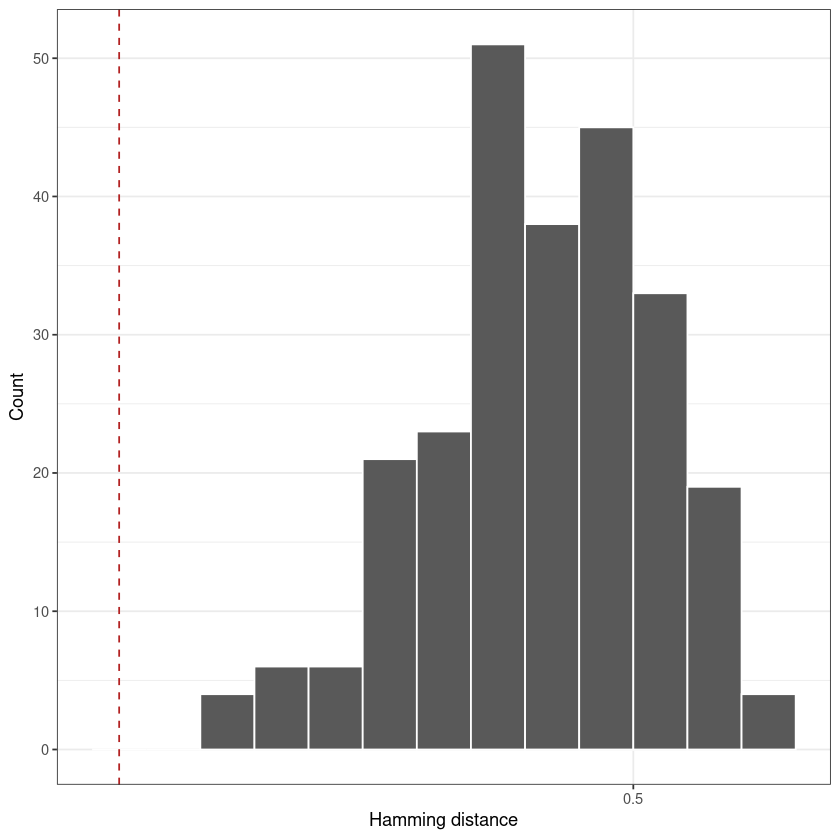

In [61]:
library(ggplot2)
p1 <- ggplot(subset(dist_sc, !is.na(dist_nearest)),
             aes(x=dist_nearest)) + 
    theme_bw() + 
    xlab("Hamming distance") + 
    ylab("Count") +
    scale_x_continuous(breaks=seq(0, 1, 0.5)) +
    geom_histogram(color="white", binwidth=0.04) +
    geom_vline(xintercept=0.12, color="firebrick", linetype=2)
plot(p1)

 ## Automated threshold detection via smoothed density

In [50]:
output <- findThreshold(dist_sc$dist_nearest, method="density")

Warning message:
“Removed 1 rows containing missing values (geom_vline).”


[1] NA


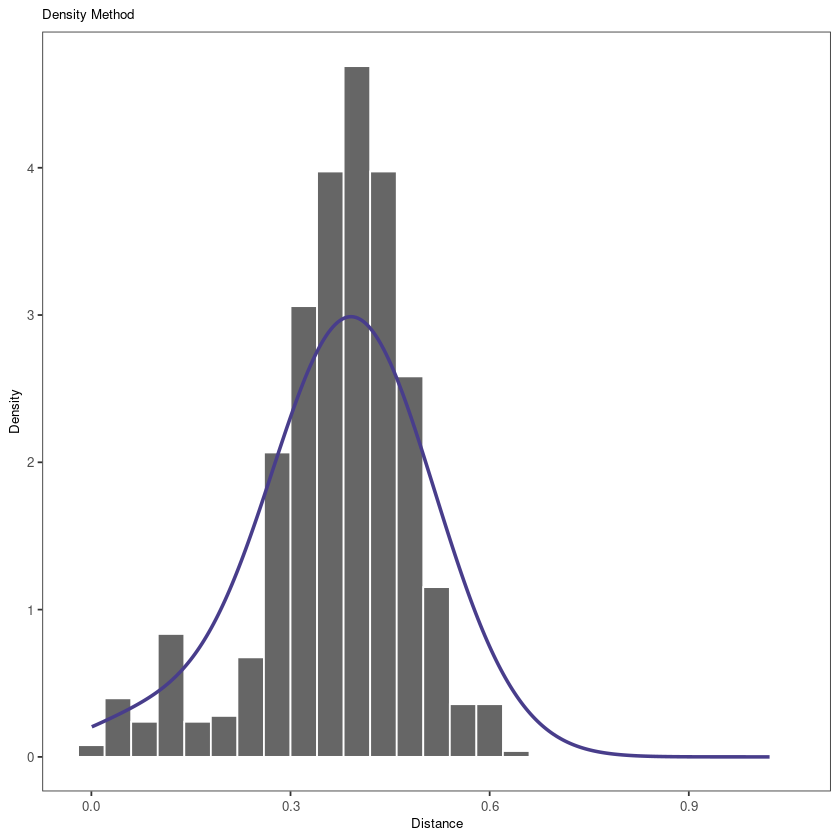

In [51]:
plot(output,binwidth=0.04, title="Density Method")
print(output@threshold)

In [52]:
output

An object of class "DensityThreshold"
Slot "x":
  [1] 0.4444 0.4074 0.3725 0.4314 0.4259 0.3922 0.3529 0.3968 0.5238 0.2917
 [11] 0.4222 0.4375 0.3810 0.3810 0.4561 0.4259 0.3111 0.5965 0.2667 0.3922
 [21] 0.1053 0.1282 0.3333 0.3725 0.3939 0.5000 0.4762 0.1053 0.2963 0.0222
 [31] 0.3939 0.0370 0.1053 0.5556 0.3333 0.3860 0.3788 0.3846 0.4167 0.4375
 [41] 0.3158 0.3778 0.3889 0.4359 0.3725 0.1053 0.3333 0.3860 0.4259 0.4815
 [51] 0.4359 0.3556 0.4444 0.5556 0.5088 0.4524 0.3846 0.4286 0.4035 0.5294
 [61] 0.2982 0.2889 0.4444 0.3750 0.4667 0.3725 0.2029 0.0625 0.4706 0.4444
 [71] 0.4048 0.2933 0.2667 0.4706 0.3333 0.4286 0.2292 0.4933 0.3846 0.5833
 [81] 0.3492 0.4561 0.4444 0.4583 0.3529 0.4848 0.3725 0.5294 0.5152 0.3333
 [91] 0.3810 0.3333 0.1778 0.3725 0.3333 0.3810 0.3778 0.2807 0.2083 0.4259
[101] 0.4286 0.3810 0.2963 0.3636 0.3056 0.3188 0.4375 0.3889 0.1053 0.3922
[111] 0.3509 0.2708 0.4048 0.2143 0.4762 0.2500 0.3623 0.3750 0.3725 0.3529
[121] 0.4889 0.4074 0.3333 0.0222 0.3529

## Automated threshold detection via a mixture model
**Note**:  the gmm method is completely bin size independent and only engages the real input data.

In [62]:
# Find threshold using gmm method
output2 <- findThreshold(dist_sc$dist_nearest, method="gmm", model="gamma-gamma")

# Plot distance histogram, Gaussian fits, and optimum threshold
plot(output2, binwidth=0.02, title="GMM Method: gamma-gamma")

In [54]:
output2@threshold
# write(output2@threshold,'./test.txt')

[1] 0.2612202